# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.plotly as py
import cufflinks as cf

cf.go_offline()

warnings.filterwarnings('ignore')
%matplotlib inline

In [30]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


Realizamos una serie de comprobaciones para poder trabajar con los datos:  
* Observamos los valores nulos
* Observamos los valoress de los años


In [5]:
data.isnull().sum()

Year                0
Month               0
Supplier           24
ItemCode            0
Description         0
ItemType            1
RetailSales         0
RetailTransfers     0
WarehouseSales      0
dtype: int64

In [31]:
data['Year'].value_counts()

2017    101910
2018     26445
Name: Year, dtype: int64

## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

Seleccionamos los valores de los campos que queremos representar más aquel por cual queremos agrupar; en este caso `ItemType` y aplicamos a los campos la suma

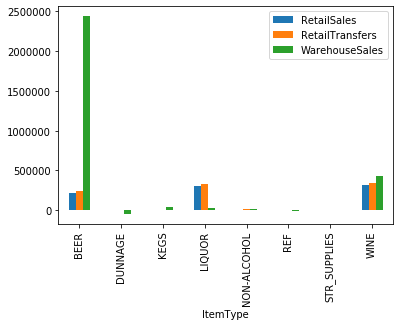

In [6]:
item_type_mean = data[['RetailSales', 'RetailTransfers', 'WarehouseSales', 'ItemType']].groupby(['ItemType']).agg(sum)
item_type_mean.plot.bar();

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

Generamos una nueva columna que se sea el resultado de sumar los campos correspondientes a las ventas: `RetailSales`  y `WarehouseSales`.  
Mostramos la representación ordenada de los primeros valores en orden descendente.

In [38]:
data['TotalSales'] = data['RetailSales'] + data['WarehouseSales']
sorted(data['TotalSales'])[::-1][0:10]

[17225.75,
 17071.120000000003,
 16336.71,
 16008.46,
 14972.71,
 13803.25,
 13796.83,
 13102.79,
 12053.5,
 11477.42]

In [8]:
data.sort_values(by=['TotalSales'], ascending=False).head(10)

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales,TotalSales
7069,2017,5,CROWN IMPORTS,23445,CORONA EXTRA LOOSE NR - 12OZ,BEER,954.0,1055.0,16271.75,17225.75
74906,2017,11,CROWN IMPORTS,23445,CORONA EXTRA LOOSE NR - 12OZ,BEER,992.0,981.0,16079.12,17071.12
34314,2017,8,CROWN IMPORTS,23445,CORONA EXTRA LOOSE NR - 12OZ,BEER,990.0,1077.0,15346.71,16336.71
32130,2017,6,CROWN IMPORTS,96750,CORONA EXTRA 2/12 NR - 12OZ,BEER,53.0,61.0,15955.46,16008.46
20662,2017,6,CROWN IMPORTS,23445,CORONA EXTRA LOOSE NR - 12OZ,BEER,1249.0,1160.0,13723.71,14972.71
72725,2017,10,CROWN IMPORTS,96750,CORONA EXTRA 2/12 NR - 12OZ,BEER,67.0,58.0,13736.25,13803.25
47878,2017,9,CROWN IMPORTS,23445,CORONA EXTRA LOOSE NR - 12OZ,BEER,1063.0,939.0,12733.83,13796.83
89403,2017,12,CROWN IMPORTS,23445,CORONA EXTRA LOOSE NR - 12OZ,BEER,1170.0,1038.0,11932.79,13102.79
128211,2018,2,CROWN IMPORTS,96750,CORONA EXTRA 2/12 NR - 12OZ,BEER,58.5,66.0,11995.00,12053.50
45723,2017,8,CROWN IMPORTS,96750,CORONA EXTRA 2/12 NR - 12OZ,BEER,59.5,56.0,11417.92,11477.42


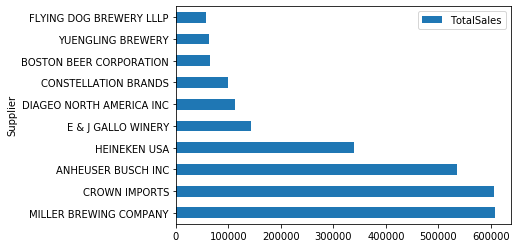

In [9]:
supplier_mean = (data[['TotalSales', 'Supplier']].groupby(['Supplier']).agg(sum)).sort_values(by='TotalSales', ascending=False)[0:10]
supplier_mean.plot.barh();

In [10]:
supplier_mean.sort_values(by='TotalSales', ascending=False).head(10)

,TotalSales
Supplier,
MILLER BREWING COMPANY,607646.04
CROWN IMPORTS,606532.53
ANHEUSER BUSCH INC,536415.33
HEINEKEN USA,339735.76
E & J GALLO WINERY,143050.62
DIAGEO NORTH AMERICA INC,111909.24
CONSTELLATION BRANDS,99441.27
BOSTON BEER CORPORATION,64194.16
YUENGLING BREWERY,63433.67


## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

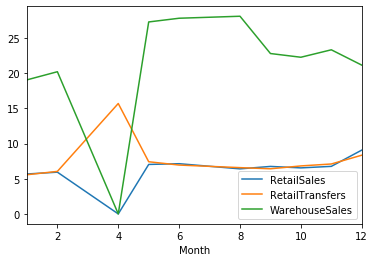

In [11]:
sales_mean = data[['RetailSales', 'RetailTransfers', 'WarehouseSales']].groupby(data['Month']).agg(np.mean)
sales_mean.plot(kind='line');

Como observamos unos valores anómalos decidimos representar los meses que corresponden al año 2017 y observamos que el gráfico empieza para valores de `mes == 4`

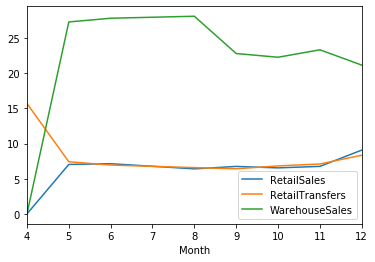

In [12]:
data_2017 = data[data['Year']== 2017]
sales_mean_2017 = data_2017[['RetailSales', 'RetailTransfers', 'WarehouseSales']].groupby(data_2017['Month']).agg(np.mean)
sales_mean_2017.plot(kind='line');

In [41]:
sorted(data_2017['Month'].unique())

[4, 5, 6, 8, 9, 10, 11, 12]

Replicamos el trabajo anterior para el año 2018

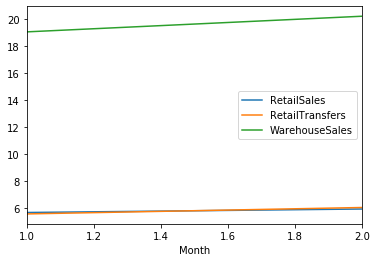

In [13]:
data_2018 = data[data['Year']== 2018]
sales_mean_2018 = data_2018[['RetailSales', 'RetailTransfers', 'WarehouseSales']].groupby(data_2018['Month']).agg(np.mean)
sales_mean_2018.plot(kind='line');

In [42]:
sorted(data_2018['Month'].unique())

[1, 2]

In [14]:
sorted(list(data['Month'].unique()))

[1, 2, 4, 5, 6, 8, 9, 10, 11, 12]

## 4. Plot the same information as above but as a bar chart.

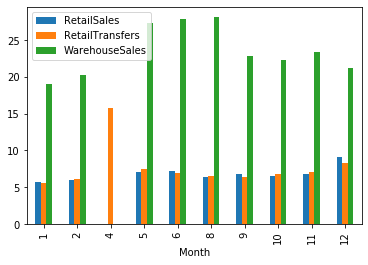

In [15]:
sales_mean_bar = data[['RetailSales', 'RetailTransfers', 'WarehouseSales', 'Month']].groupby(['Month']).agg(np.mean)
sales_mean_bar.plot.bar();

Se puede apreciar que no se dispone de valores correspondientes a los campor de `RetailSales`  y  `WarehouseSales`



## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

In [16]:
retail_data =data.pivot_table(values=['RetailSales'], columns='ItemType', index='Month',
                         aggfunc='sum')

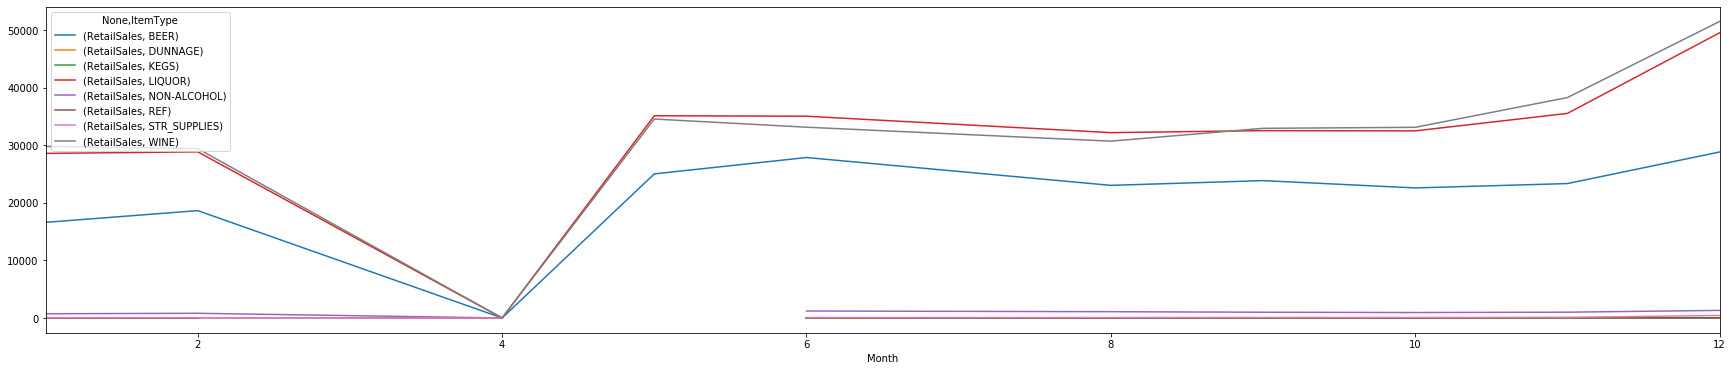

In [17]:
retail_sales = retail_data[['RetailSales']].groupby(data['Month'])
retail_sales
retail_sales.plot(kind='line', figsize=(30, 6));

En el gráfico apreciamos cómo hay un salto en el gráfico en algunos valores; por tanto, procedemos a rellenar los valores que son igual a NaN con un valor numérico de 0.

In [18]:
retail_data2 =data.pivot_table(values=['RetailSales'], columns='ItemType', index='Month',
                         aggfunc='sum').fillna(0)

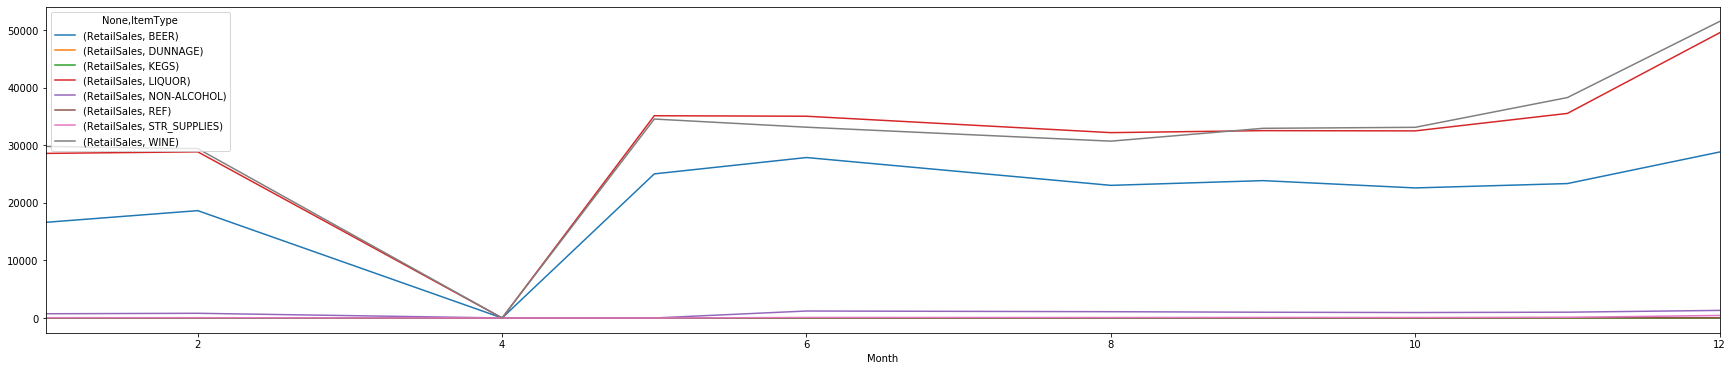

In [19]:
retail_sales2 = retail_data2[['RetailSales']].groupby(data['Month'])
retail_sales2
retail_sales2.plot(kind='line', figsize=(30, 6));

## 6. Plot the same information as above but as a bar chart.

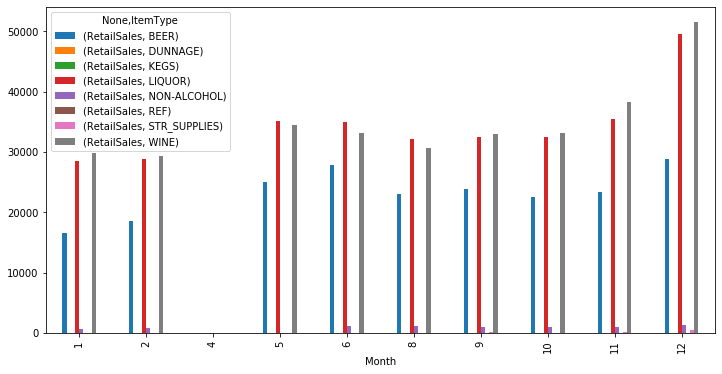

In [20]:
retail_sales = retail_data[['RetailSales']].groupby(data['Month'])
retail_sales
retail_sales.plot(kind='bar', figsize=(12, 6));

Repetimos el proceso de substituir los valores NaN por 0 y graficamos

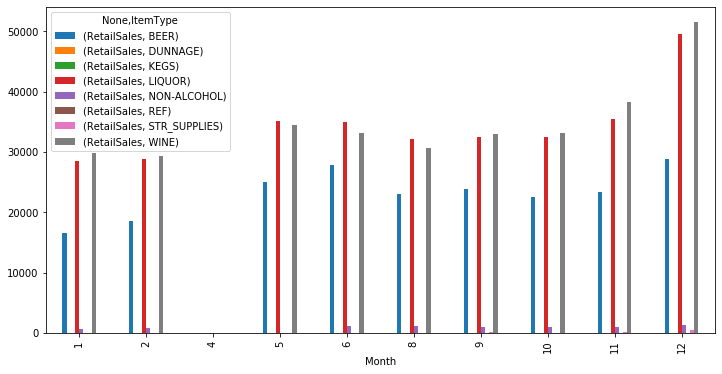

In [21]:
retail_sales3 = retail_data2[['RetailSales']].groupby(data['Month'])
retail_sales3
retail_sales3.plot(kind='bar', figsize=(12, 6));

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

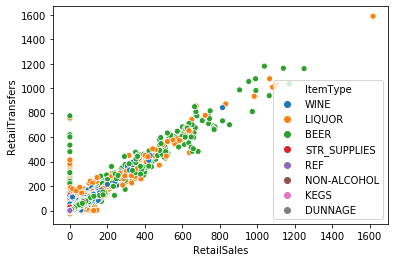

In [22]:
ax = sns.scatterplot(x="RetailSales", y="RetailTransfers", hue="ItemType",
                     data=data)

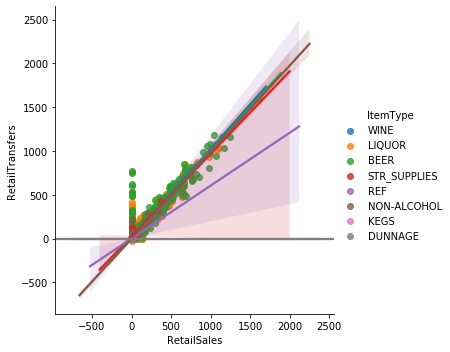

In [23]:
g = sns.lmplot(x="RetailSales", y="RetailTransfers", hue="ItemType", data=data)

A continuación decidimos representar en gráficas separadas pero manteniendo el código de color:

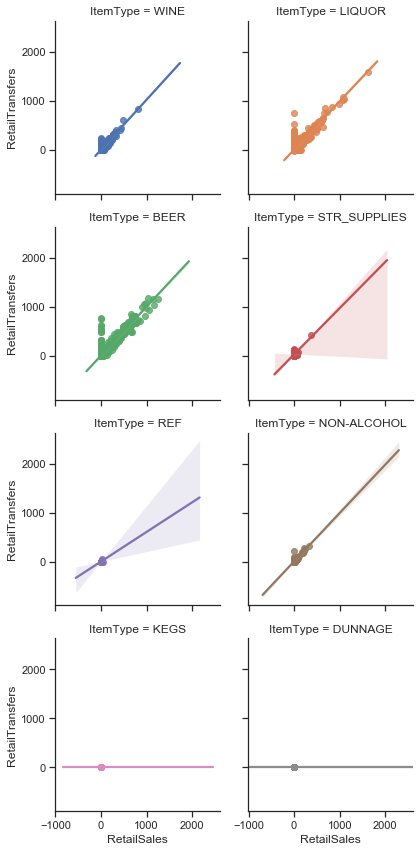

In [67]:
g = sns.lmplot(x="RetailSales", y="RetailTransfers", hue="ItemType", col="ItemType",
               data=data, height=3, x_jitter=.5,  col_wrap=2)

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

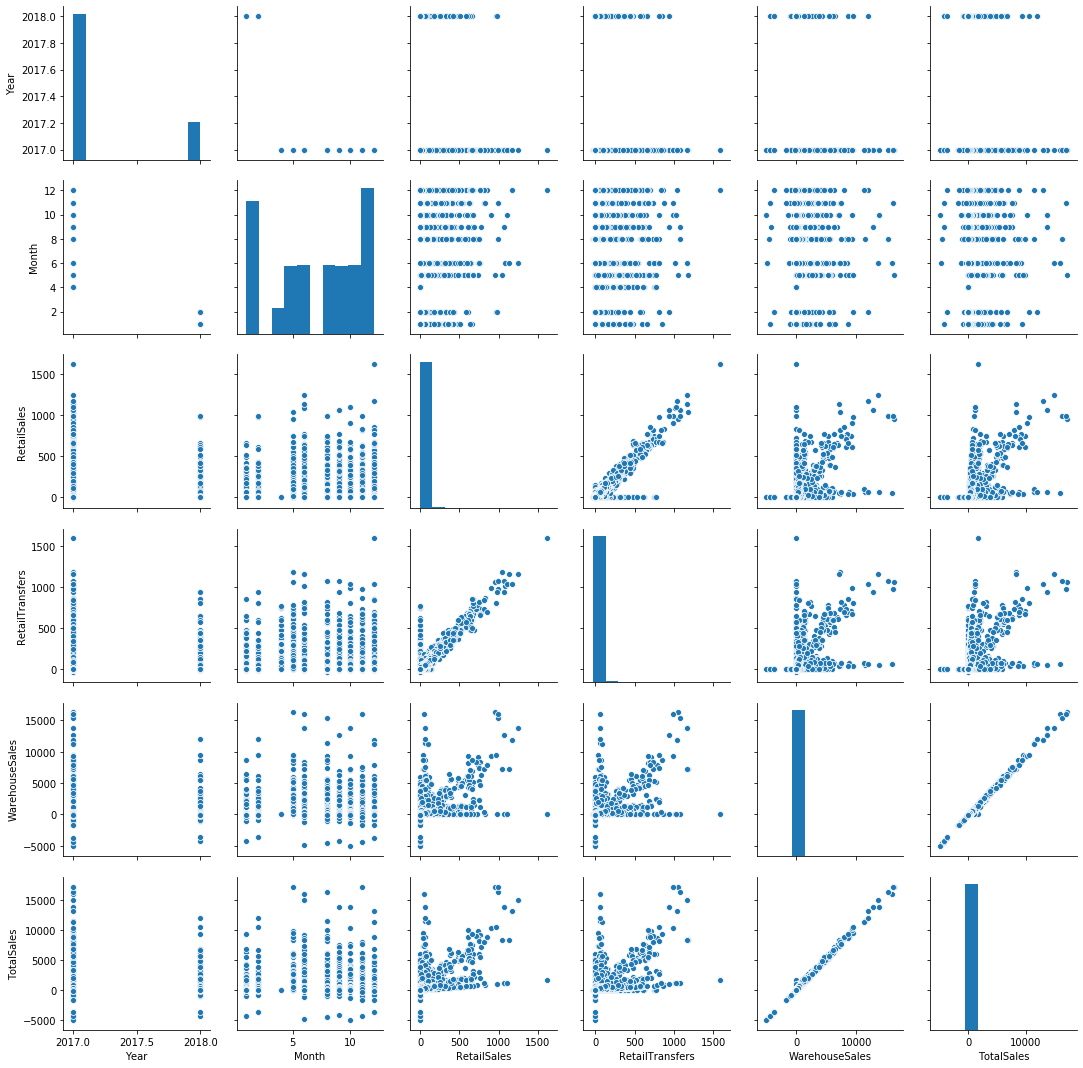

In [25]:
g = sns.pairplot(data)

In [64]:
data['ItemType'].fillna('NO TYPE')
data['ItemType'].unique()

array(['WINE', 'LIQUOR', 'BEER', 'STR_SUPPLIES', 'REF', 'NON-ALCOHOL',
       'KEGS', 'DUNNAGE', nan], dtype=object)

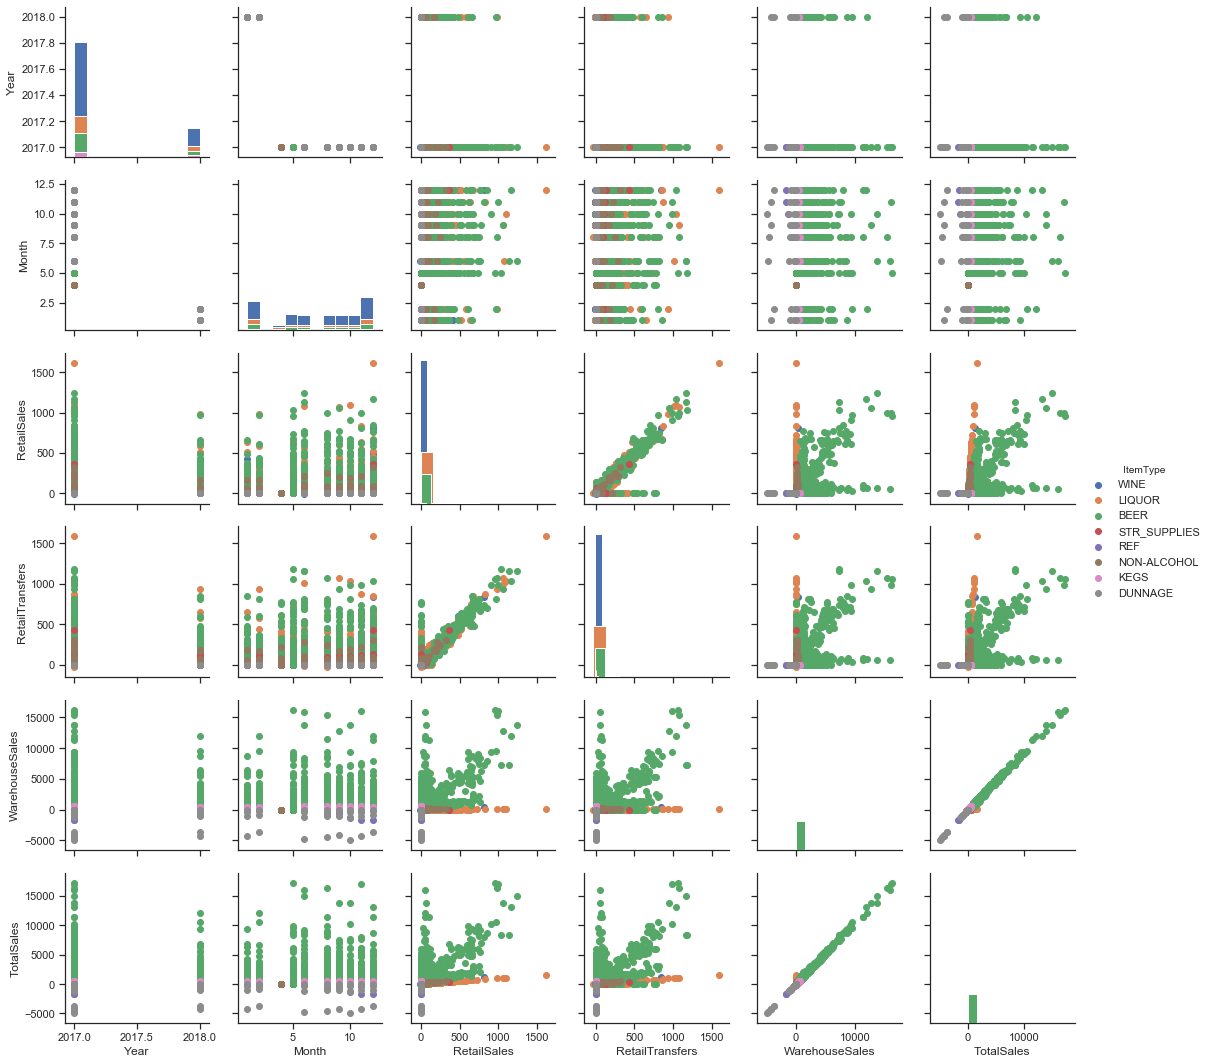

In [57]:
h = sns.PairGrid(data, hue='ItemType')
h= h.map_diag(plt.hist)
h= h.map_offdiag(plt.scatter)
h= h.add_legend()

In [60]:
data_not_null = data.dropna()

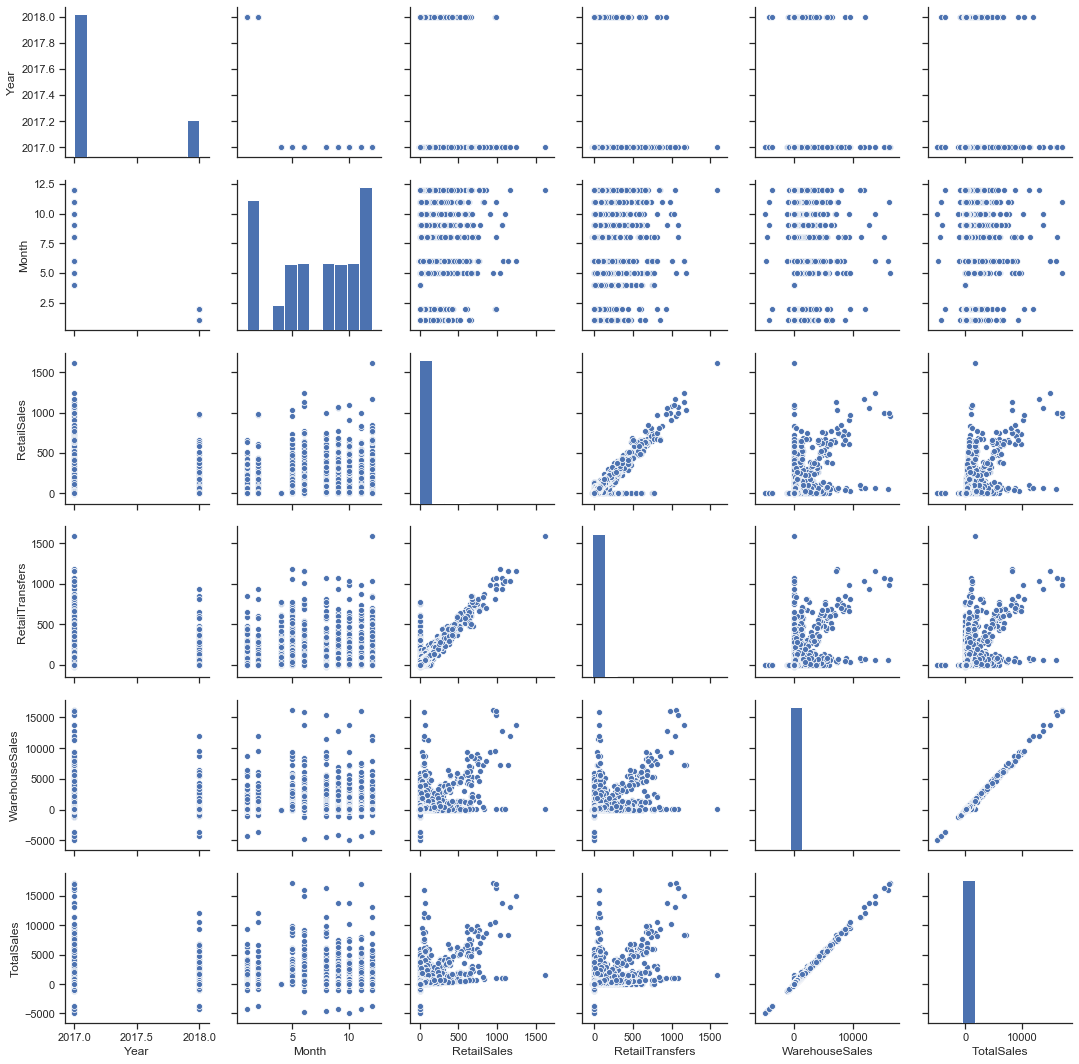

In [61]:
g = sns.pairplot(data_not_null)

Hacemos distintas pruebas y observamos que no funciona. Eliminamos los valores nulos y no funciona...

Realizamos más pruebas para eliminar valores negativos pero no funciona de la manera esperada. Así que, asumimos (por ahora) la manera de condicionar los colores por una columna en este dataframe es con el método PairGrid.  
Finalmente, añadimos otro digrama de líneas en lugar del histograma :)

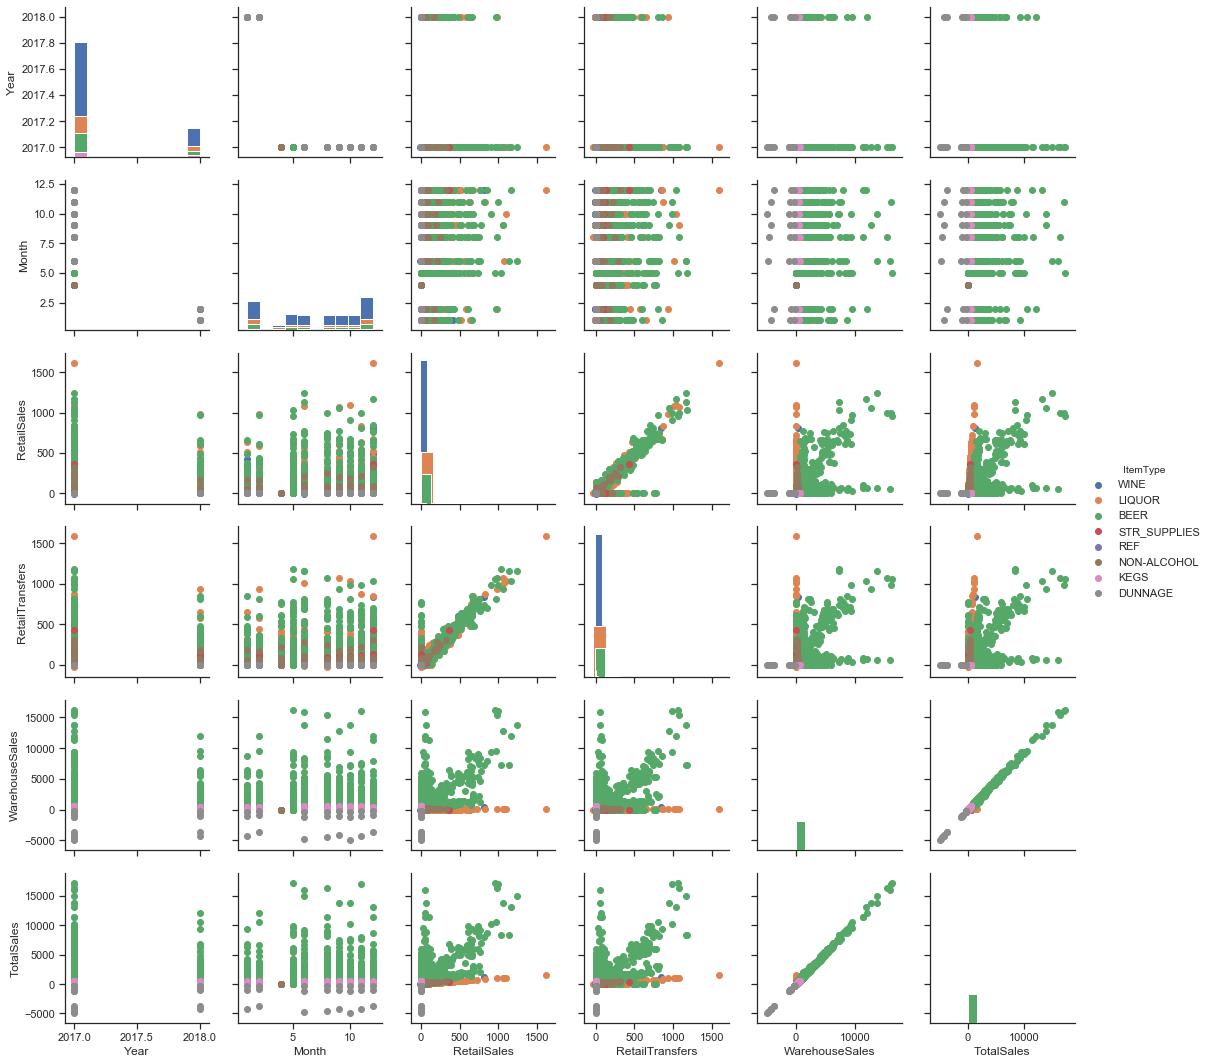

In [63]:
h = sns.PairGrid(data_not_null, hue='ItemType')
h = h.map_diag(plt.hist)
h = h.map_offdiag(plt.scatter)
h = h.add_legend()

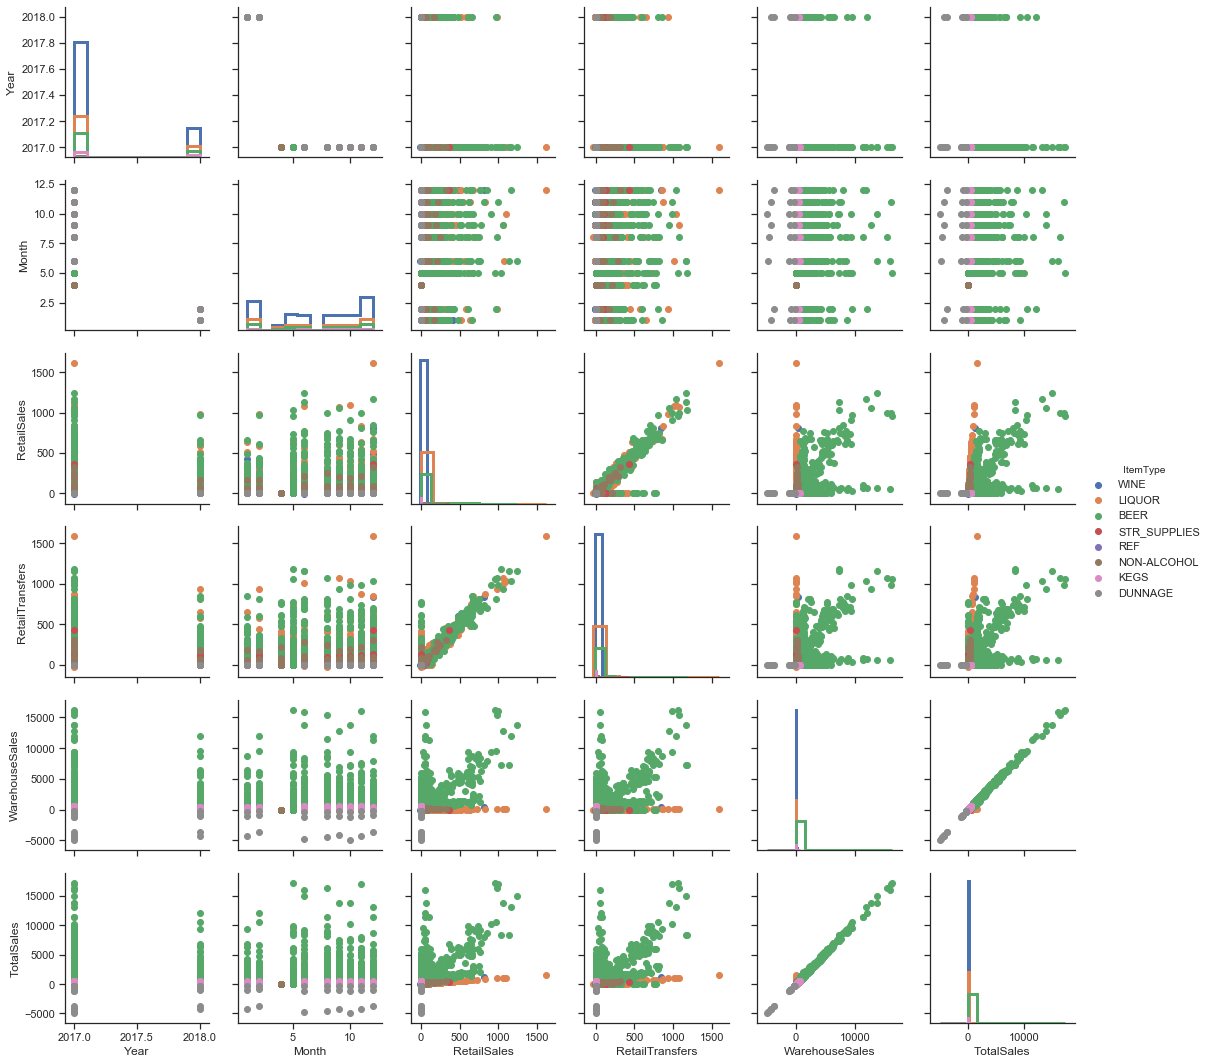

In [88]:
g = sns.PairGrid(data_not_null, hue='ItemType')
g = g.map_diag(plt.hist, histtype="step", linewidth=3)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()